In [22]:
import pandas as pd
import seaborn as sns

In [23]:
df = pd.read_csv('clean_data.csv')
df1 = pd.read_csv('mental-heath-in-tech-2016_20161114.csv')
pd.set_option('display.max_columns', None)


## Clustering
'Do you know the options for mental health care available under your employer-provided coverage?'


'Do you currently have a mental health disorder?'

C:\Users\perez\AppData\Local\Temp\ipykernel_28832\2446714732.py:14: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(gower_dist, method='complete')


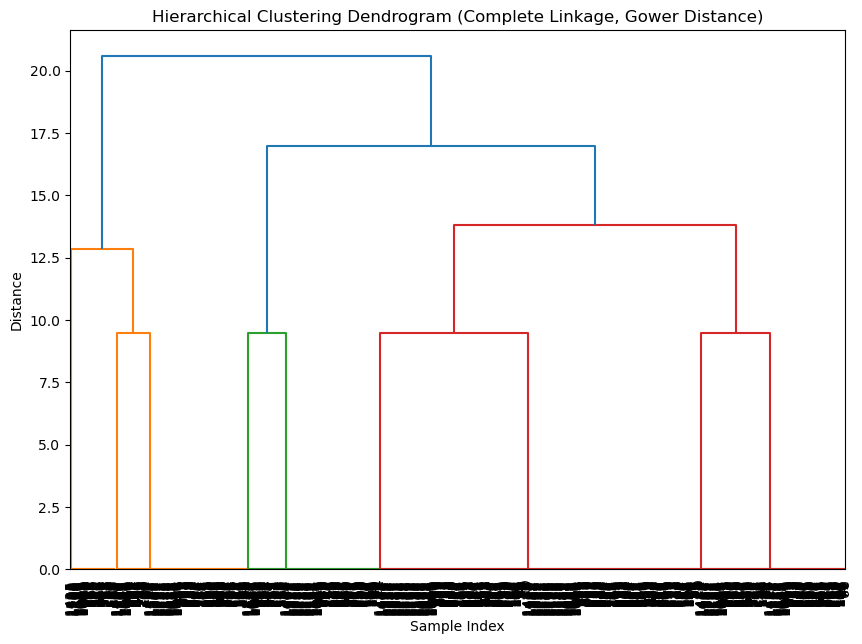

In [24]:
from sklearn.metrics import pairwise_distances
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
from gower import gower_matrix


data = df[['Do you know the options for mental health care available under your employer-provided coverage?',
'Do you currently have a mental health disorder?']]
data = data.to_numpy(dtype=float)
# Compute the Gower distance matrix
gower_dist = gower_matrix(data)

# Perform hierarchical clustering using Complete Linkage
Z = linkage(gower_dist, method='complete')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z, labels=df.index, leaf_rotation=90, leaf_font_size=10)
plt.title('Hierarchical Clustering Dendrogram (Complete Linkage, Gower Distance)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

In [25]:
from scipy.cluster.hierarchy import fcluster
import pandas as pd
import numpy as np
# Define the height threshold for cutting the dendrogram
height_threshold = 15

# Compute the cluster labels based on the height threshold
cluster_labels = fcluster(Z, t=height_threshold, criterion='distance')

# Create a new DataFrame to store the cluster labels
# Assuming the original DataFrame 'df' has the same number of rows
clusterdf = pd.DataFrame({
    'Index': df.index,  # Preserve the original index
    'Cluster': cluster_labels,  # Add cluster labels
    'Do you currently have a mental health disorder?' : df['Do you currently have a mental health disorder?'],
    'Do you know the options for mental health care available under your employer-provided coverage?' : df['Do you know the options for mental health care available under your employer-provided coverage?']
})

# If you want to set the index of the new DataFrame to be the same as the original DataFrame
clusterdf.set_index('Index', inplace=True)

# Display the new DataFrame with cluster labels
clusterdf.head()

,Cluster,Do you currently have a mental health disorder?,Do you know the options for mental health care available under your employer-provided coverage?
Index,,,
0,3,1,1
1,2,2,2
2,3,1,1
3,3,2,1
4,2,2,2


In [26]:
np.unique(clusterdf['Cluster'])

array([1, 2, 3], dtype=int32)

In [27]:

var_labels = {0: 'I dont know' ,1: 'No', 2: 'Yes'}

clusterdf['Do you know the options for mental health care available under your employer-provided coverage?'] = clusterdf['Do you know the options for mental health care available under your employer-provided coverage?'] .map(var_labels)

var1_labels = {0: 'Maybe', 1: 'No', 2: 'Yes'}

# Apply the mapping to the DataFrame
clusterdf['Do you currently have a mental health disorder?'] = df['Do you currently have a mental health disorder?'] .map(var1_labels)

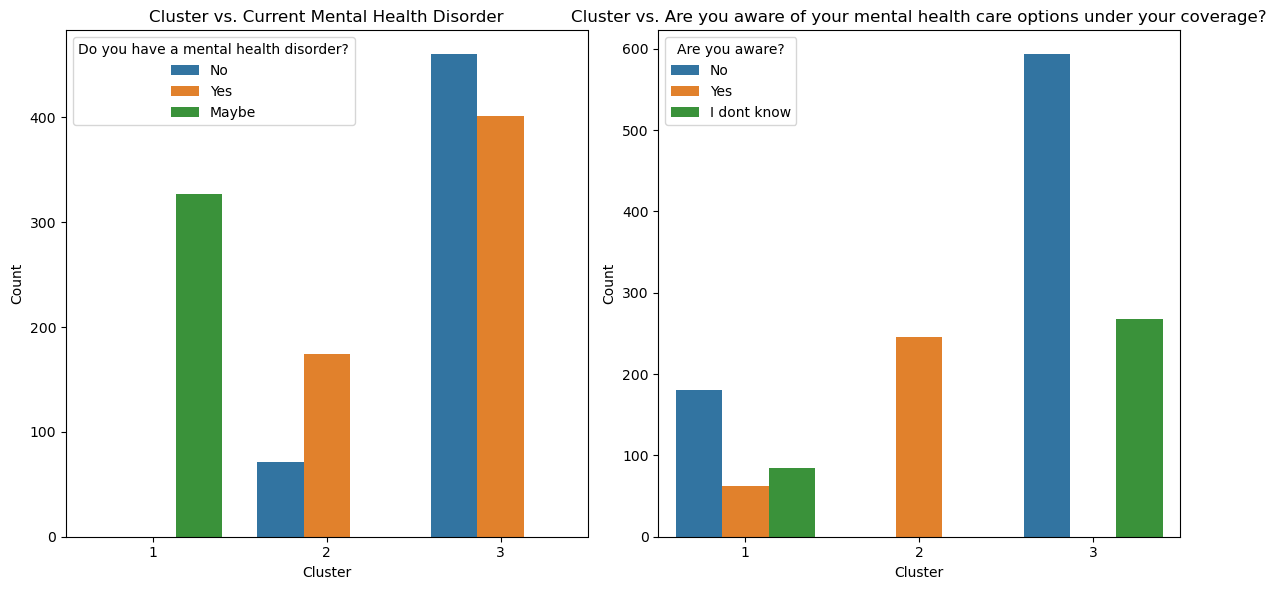

In [28]:

plt.figure(figsize=(12, 6))

# Plotting Cluster vs Mental disorder

plt.subplot(1, 2, 1)
sns.countplot(data=clusterdf, x='Cluster', hue='Do you currently have a mental health disorder?')
plt.title('Cluster vs. Current Mental Health Disorder')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.legend(title='Do you have a mental health disorder?')

plt.subplot(1, 2, 2)
sns.countplot(data=clusterdf, x='Cluster', hue='Do you know the options for mental health care available under your employer-provided coverage?')
plt.title('Cluster vs. Are you aware of your mental health care options under your coverage?')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.legend(title='Are you aware?')

plt.tight_layout()
plt.show()

#### Clustering 
the answers of mental disrder participants and 

'If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?' 

'If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?' 


C:\Users\perez\AppData\Local\Temp\ipykernel_28832\105953608.py:14: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(gower_dist, method='complete')


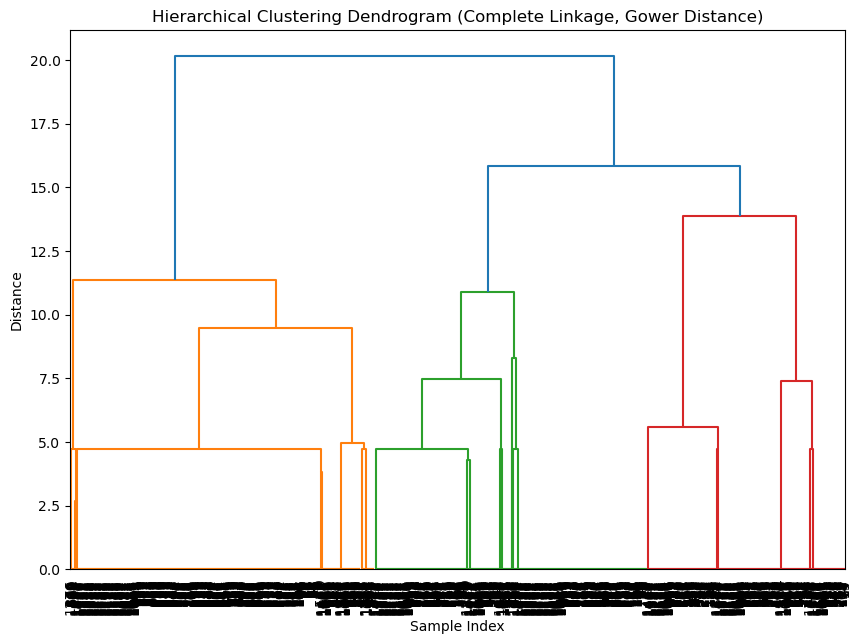

In [29]:
from sklearn.metrics import pairwise_distances
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
from gower import gower_matrix


data = df[['If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?',
'If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?']]
data = data.to_numpy(dtype=float)
# Compute the Gower distance matrix
gower_dist = gower_matrix(data)

# Perform hierarchical clustering using Complete Linkage
Z = linkage(gower_dist, method='complete')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z, labels=df.index, leaf_rotation=90, leaf_font_size=10)
plt.title('Hierarchical Clustering Dendrogram (Complete Linkage, Gower Distance)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

In [31]:
from scipy.cluster.hierarchy import fcluster
import pandas as pd
import numpy as np
# Define the height threshold for cutting the dendrogram
height_threshold = 15

# Compute the cluster labels based on the height threshold
cluster_labels = fcluster(Z, t=height_threshold, criterion='distance')

# Create a new DataFrame to store the cluster labels
# Assuming the original DataFrame 'df' has the same number of rows
clusterdf = pd.DataFrame({
    'Index': df.index,  # Preserve the original index
    'Cluster': cluster_labels,  # Add cluster labels
    'If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?' : df['If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?'],
    'If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?' : df['If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?']
})

# If you want to set the index of the new DataFrame to be the same as the original DataFrame
clusterdf.set_index('Index', inplace=True)

# Display the new DataFrame with cluster labels
clusterdf.head()

,Cluster,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?"
Index,,,
0,1,1,1
1,3,3,4
2,1,1,1
3,3,4,4
4,3,4,4


In [32]:
var_labels = {0: 'Never', 1: 'Not applicable', 2: 'Often', 3: 'Rarely', 4: 'Sometimes'}

clusterdf['If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?'] = clusterdf['If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?'] .map(var_labels)



# Apply the mapping to the DataFrame
clusterdf['If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?'] = df['If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?'] .map(var_labels)

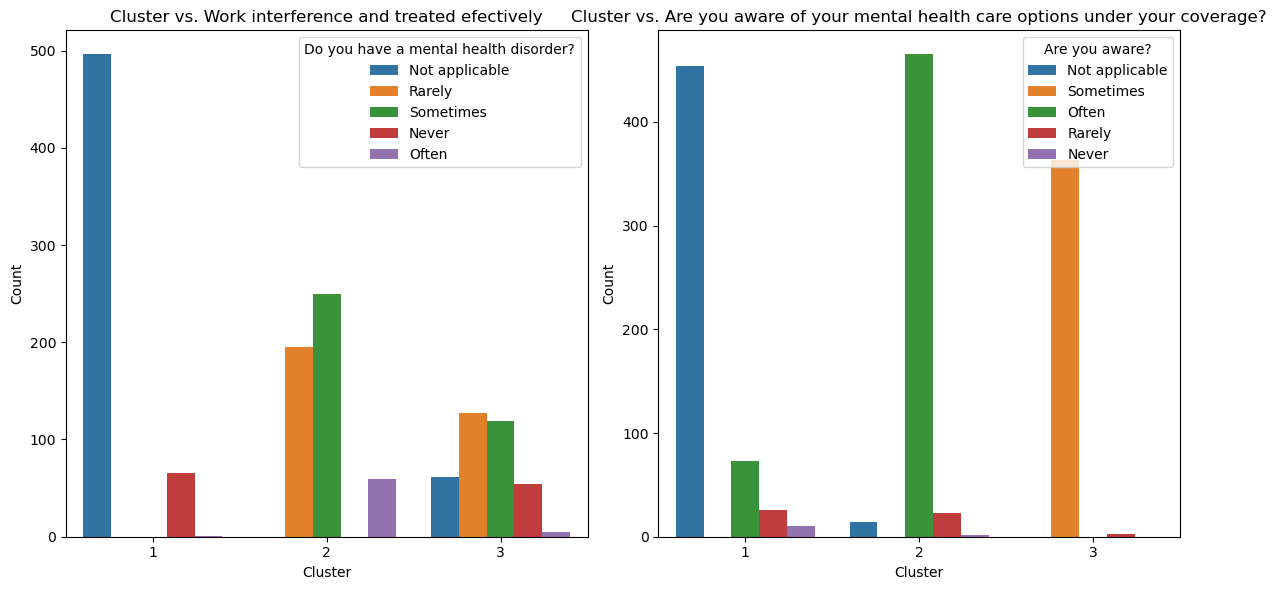

In [33]:
plt.figure(figsize=(12, 6))

# Plotting Cluster vs Mental disorder

plt.subplot(1, 2, 1)
sns.countplot(data=clusterdf, x='Cluster', hue='If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?')
plt.title('Cluster vs. Work interference and treated efectively')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.legend(title='Do you have a mental health disorder?')

plt.subplot(1, 2, 2)
sns.countplot(data=clusterdf, x='Cluster', hue='If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?')
plt.title('Cluster vs. Are you aware of your mental health care options under your coverage?')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.legend(title='Are you aware?')

plt.tight_layout()
plt.show()